<center><bold>Eindopdracht voor computer vision, binaire classificatie van hersenscans</bold></center>

In [4]:
# Dit is het CNN net als het eerste paper, zie literatuurlijst, element 1
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Reshape
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import randint,seed
from time import time_ns

In [5]:

##even de datasets ophalen
data_dir = "..\\data"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=486235864,
  image_size=(28, 32),
  batch_size=16)
images_train = []
labels_train = []


vals_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=486235864,
  image_size=(28, 32),
  batch_size=1)




Found 2800 files belonging to 2 classes.
Using 2240 files for training.
Found 2800 files belonging to 2 classes.
Using 560 files for validation.


In [6]:
#in het paper wordt een niet-sequentieel netwerk gebruikt,
# hier is gekozen om wel een sequentieel netwerk te gebruiken
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='softmax'),
  tf.keras.layers.Dense(2)
])
# wel in overeenstemming met het paper is het gebruik van de adam optimizer en de CategoricalCrossentropy loss functie
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [7]:
#train het model met 20 epochs
hist = model.fit(train_ds, epochs=20,validation_data= vals_ds)

Epoch 1/20
140/140 [==============================] - 5s 26ms/step - loss: 0.6243 - accuracy: 0.6862 - val_loss: 0.5708 - val_accuracy: 0.7464
Epoch 2/20
140/140 [==============================] - 4s 25ms/step - loss: 0.5579 - accuracy: 0.7576 - val_loss: 0.5205 - val_accuracy: 0.7946
Epoch 3/20
140/140 [==============================] - 5s 32ms/step - loss: 0.4933 - accuracy: 0.8152 - val_loss: 0.4555 - val_accuracy: 0.8429
Epoch 4/20
140/140 [==============================] - 4s 31ms/step - loss: 0.4311 - accuracy: 0.8531 - val_loss: 0.3926 - val_accuracy: 0.8786
Epoch 5/20
140/140 [==============================] - 5s 34ms/step - loss: 0.3585 - accuracy: 0.8996 - val_loss: 0.3657 - val_accuracy: 0.8839
Epoch 6/20
140/140 [==============================] - 6s 41ms/step - loss: 0.3100 - accuracy: 0.9183 - val_loss: 0.3283 - val_accuracy: 0.8911
Epoch 7/20
140/140 [==============================] - 5s 35ms/step - loss: 0.2674 - accuracy: 0.9339 - val_loss: 0.2627 - val_accuracy: 0.9321

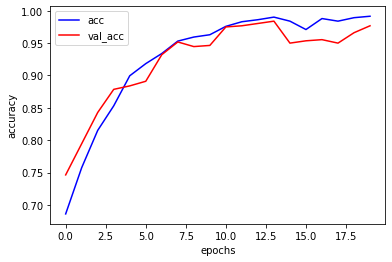

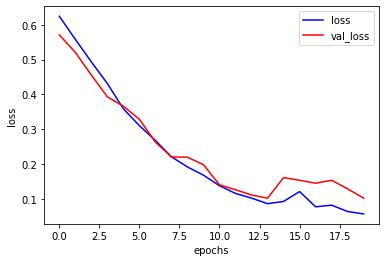

560/560 - 1s - loss: 0.1018 - accuracy: 0.9768 - 1s/epoch - 2ms/step


In [8]:
# maak diagrammen van het fitten van het netwerk
plt.plot(hist.history["accuracy"],color = "blue")
plt.plot(hist.history["val_accuracy"],color = "red")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["acc", "val_acc"])
plt.show()
plt.plot(hist.history["loss"],color = "blue")
plt.plot(hist.history["val_loss"],color = "red")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(["loss", "val_loss"])
plt.show()
test_loss, test_acc = model.evaluate(vals_ds, verbose=2)

In [9]:
print(test_acc) #print de accuracy op de validatie set

0.9767857193946838


In [10]:
test_dir = "..\\test" #haal de nog ongeziene test set op
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=486235864,
  image_size=(28, 32),
  batch_size=1)

test_loss, test_acc = model.evaluate(test_ds, verbose=2)



Found 200 files belonging to 2 classes.
200/200 - 1s - loss: 0.2538 - accuracy: 0.9300 - 680ms/epoch - 3ms/step


In [11]:
print(test_acc)

0.9300000071525574


In [15]:
#snelle functie om eindresultaat te tonen
def show_res(img,  res):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(img.shape[0]/4, img.shape[1]/4))
    ax.imshow(img, cmap='gray')
    if(res == 1):
        ax.set_title('tumor', fontsize=100)
    elif(res == 0):
        ax.set_title('healty', fontsize=100)

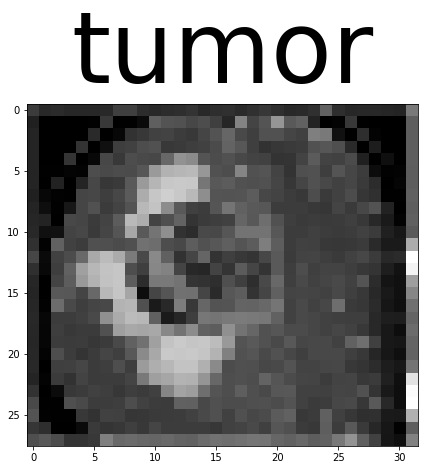

In [17]:
from skimage.color import rgb2gray
spull = test_ds.take(1)
images_test = []
labels_test = []
#splits de dataset in labels en images
for images, labels in test_ds:
    images_test.append(images)
    labels_test.append(labels)
#plt.imshow(np.asanyarray(spull))
seed(time_ns())#random seed met systeem tijd in nano seconden
test_IM = randint(0,len(images_test))
predictions = model.predict(images_test[test_IM])
img = rgb2gray(images_test[test_IM][0]) #maax grijs om te kunnen tonen(de shower verwacht altijd grayscale)
res = np.argmax(predictions) #zoek de hoogst gewaardeerde klasse
show_res(img, res) #bereid het resultaat voor
plt.show() # en toon dit






In [18]:
model.save("model.h5")